In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
warnings.filterwarnings('ignore')

**UNDERSTANDING THE DATA**

In [3]:
train_data = pd.read_csv('loan_sanction_train.csv')
test_data = pd.read_csv('loan_sanction_test.csv')

In [4]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train_data, test_data = train_data.drop('Loan_ID', axis = 1), test_data.drop('Loan_ID', axis = 1)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**DATA CLEANING**

In [8]:
train_data.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
def fillNa(data):
    for i in data.columns:
        freq = data[i].mode()[0]
        data[i] = data[i].fillna(freq)
    return data

In [10]:
train_data = fillNa(train_data)

In [11]:
train_data.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [12]:
label_enc = LabelEncoder()
train_data.Loan_Status = label_enc.fit_transform(train_data.Loan_Status)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [13]:
def encodeDependents(data):
    for i in range(len(data.Dependents)):
        if data.Dependents[i] == '3+':
            data.Dependents[i] = data.Dependents[i].replace(data.Dependents[i], '3', 1)
    return data
encodeDependents(train_data)
encodeDependents(test_data)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
def encodeFeatures(data):
    ordinal_enc = OrdinalEncoder()
    cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', "Property_Area"]
    data[cat_features] = ordinal_enc.fit_transform(data[cat_features])
    return data
encodeFeatures(train_data)
encodeFeatures(test_data)
train_data = train_data.astype('float64')
test_data = test_data.astype('float64')

**EDA**

In [15]:
cat_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

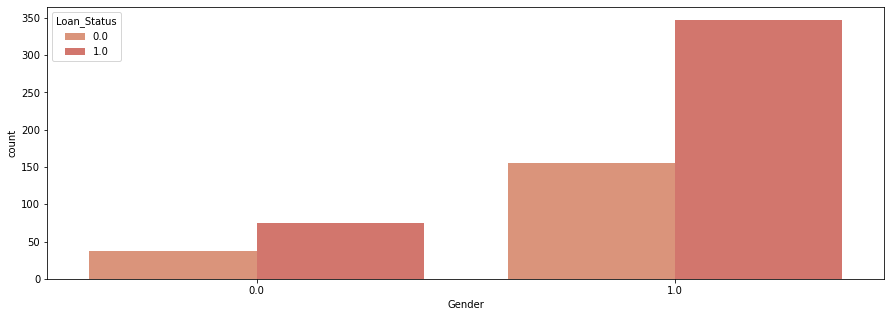

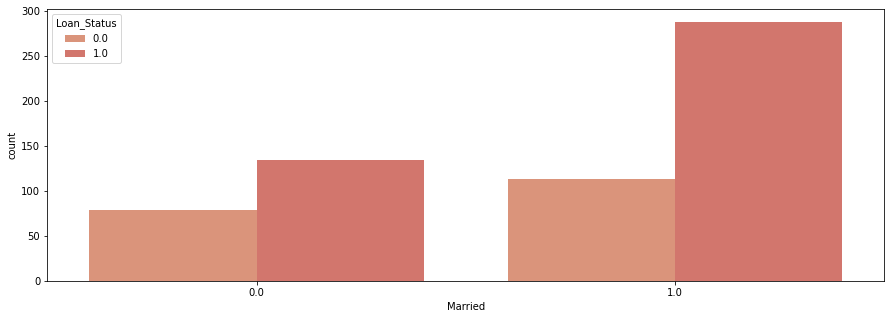

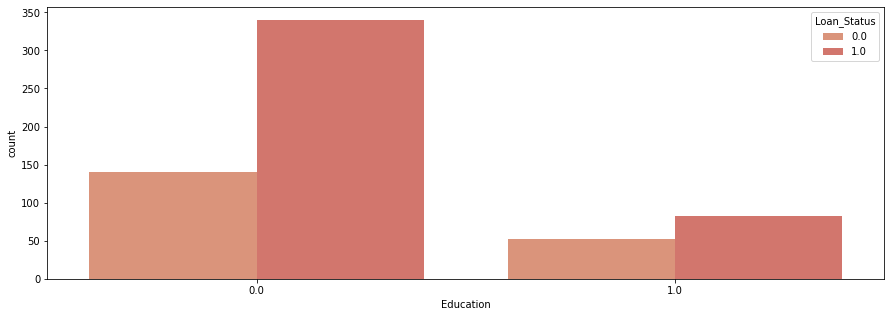

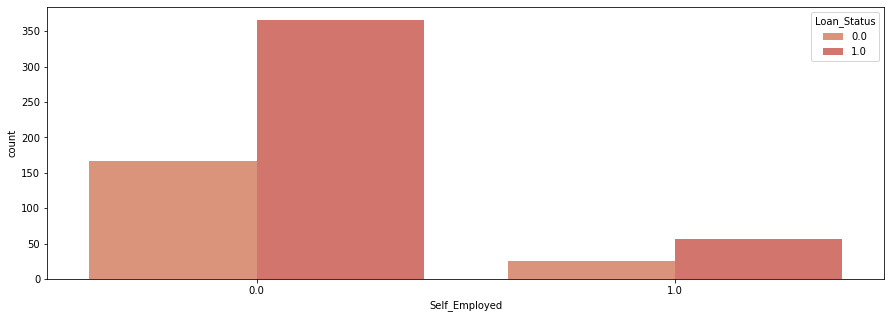

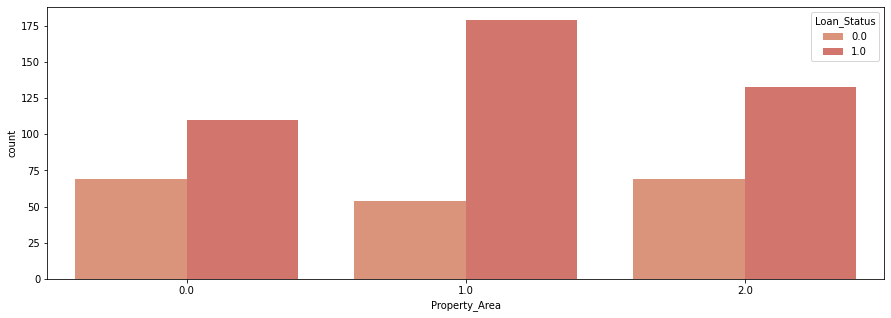

In [16]:
pal = sns.color_palette('flare')
for i in cat_features:
    plt.figure(figsize=(15, 5))
    sns.countplot(train_data[i], hue = train_data.Loan_Status, palette=pal)
    


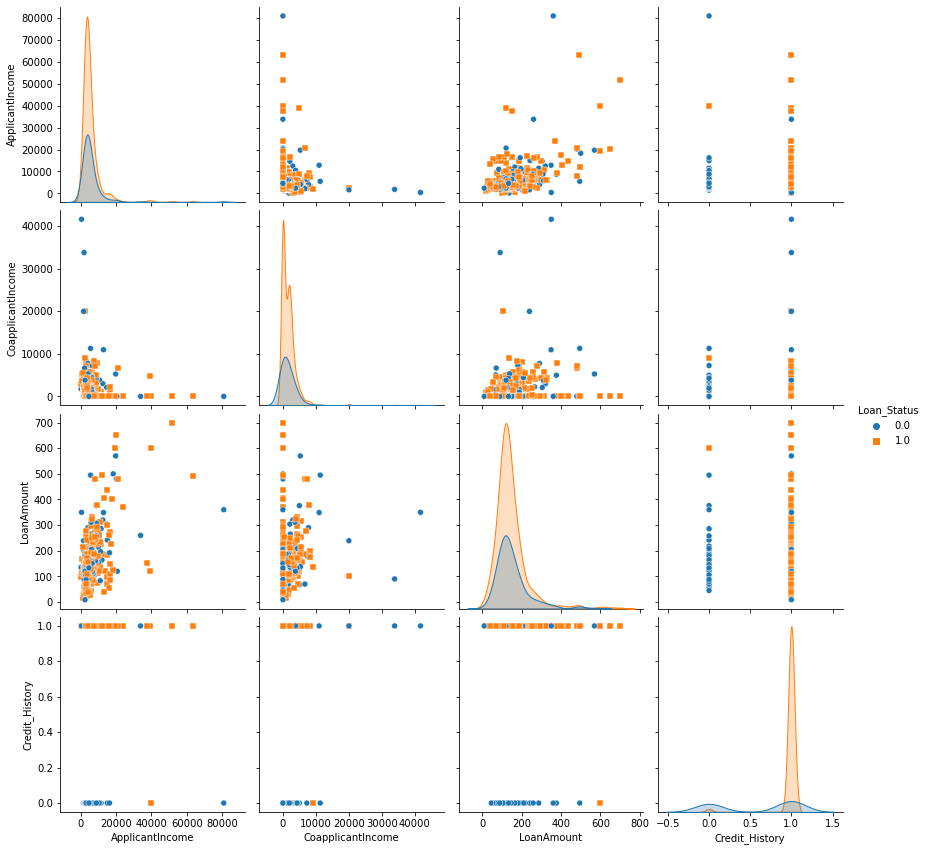

In [17]:
sns.pairplot(
    train_data, 
    hue = 'Loan_Status', 
    height=3, 
    markers = ['o', 's'],
    x_vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'],
    y_vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
)

**BUILDING A MODEL**

**SOME PREPROCESSING**

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

In [24]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

**APPROACH 1.
  XGBOOST**

In [20]:
%%time
model = XGBClassifier(verbosity=0)
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.05, 0.1, 0.2,  0.3],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7],
    'colsample_bytree': [0.5, 1],
}
cv = GridSearchCV(model, param_grid=params, cv = 5, error_score='raise')
cv.fit(X_train, y_train)

CPU times: user 8min 8s, sys: 3min 5s, total: 11min 13s
Wall time: 1min 33s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monoto...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=0),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [25]:
best_model = cv.best_estimator_
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.8246753246753247

F1_score 0.8860759493670887


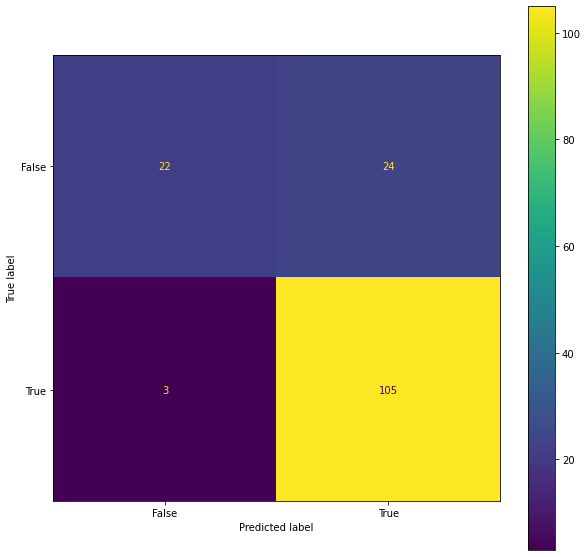

In [26]:
fig, ax = plt.subplots(figsize = (10, 10))
conf = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels=[False, True])
disp.plot(ax = ax)
print('F1_score', f1_score(y_test, pred))

**APPROACH 2. MULTILAYER ANN**

In [49]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler

In [50]:
#SCALING DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [51]:
model = Sequential()
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 20, validation_split=0.25, batch_size = 4, verbose = 0)

2023-02-03 16:49:09.507239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-03 16:49:09.930875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'accuracy')

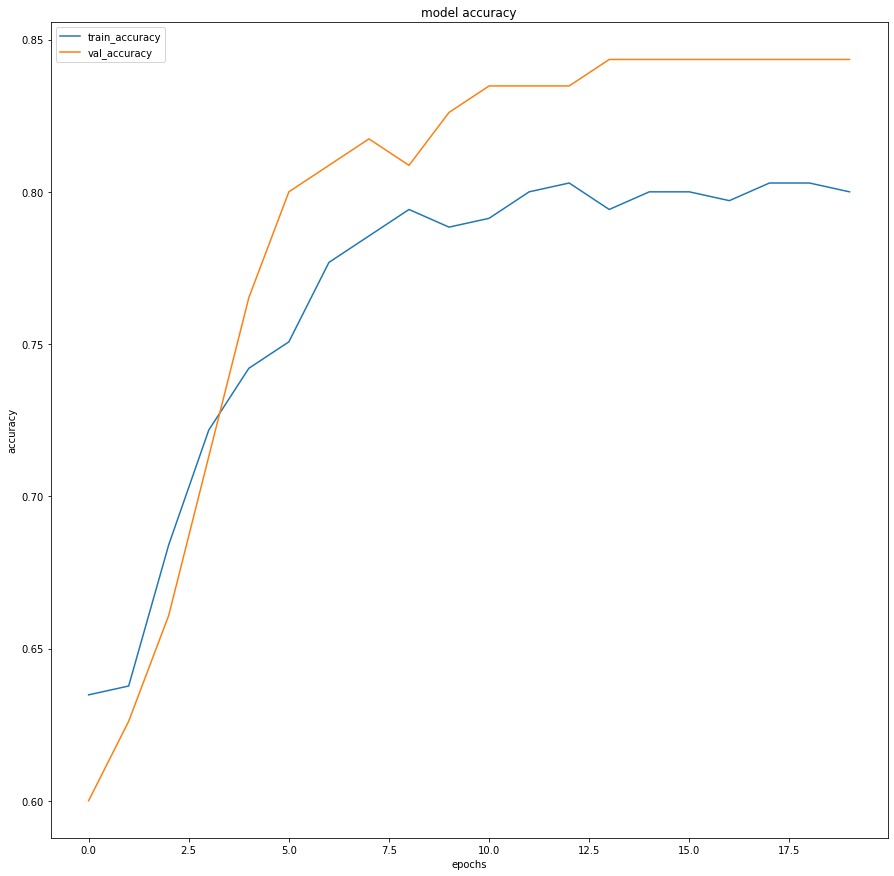

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize= (15, 15))
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

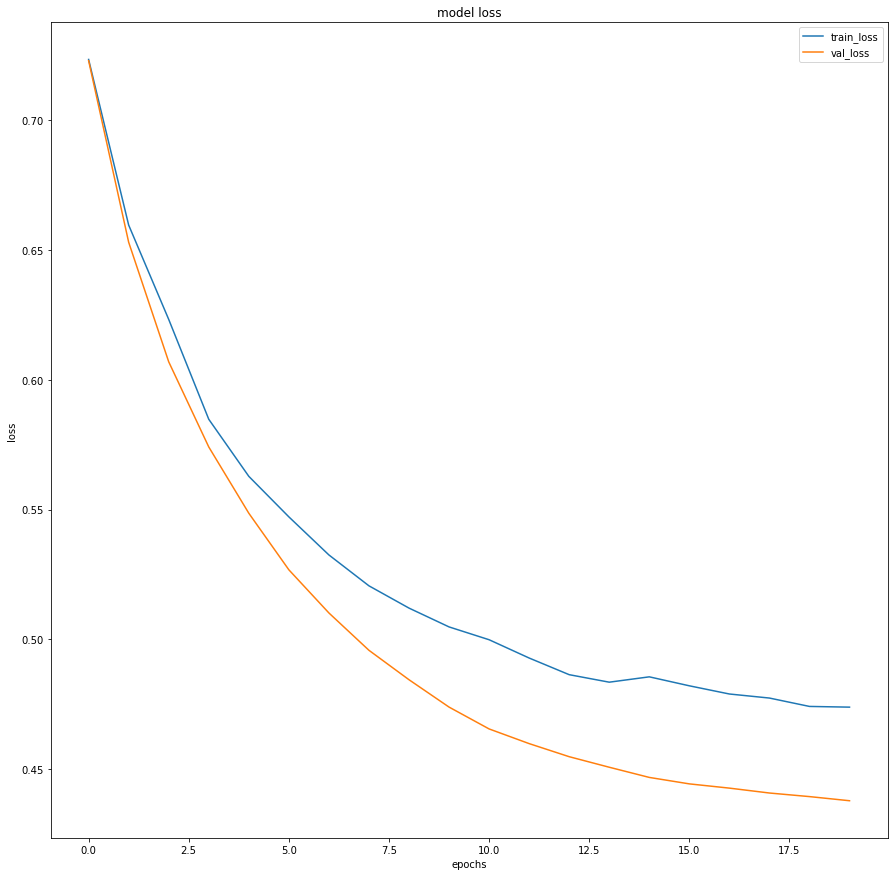

In [54]:
plt.figure(figsize= (15, 15))
plt.title('model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')